In part 1 of this notebook, a regression model will be built using Keras deep learning framework to predict the compressive strength of concrete, based on its ingredients. The model will be trained several times with different network properties such as the number of epochs and hidden layers, to increase the model accuracy.

<h2><center> Building a Concrete Compressive Strength Model using Keras Framework </center></h2>



<strong>Concrete Ingredients:</strong>
<ol type="1">
  <li>Cement</li>
  <li>Blast Furnace Slag</li>
  <li>Fly Ash</li>
  <li>Water</li>
  <li>Superplasticizer</li>
  <li>Coarse Aggregate</li>
  <li>Fine Aggregate</li>
  <li>Age</li>
</ol>

### 1. OBTAIN - Obtain Data from its Source.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Let's check the shape of the dataframe:

In [5]:
df.shape

(1030, 9)

It has 1030 rows and 9 columns.

### 2. SCRUB - Clean / Preprocess Data to Format that Machine Understand.

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

The data looks very clean; no missing data and all data is in numerical form. 

Nothing much here, lets move to our next step!

### 3. EXPLORE - Find Significant Patterns and Trends using Statistical Method.

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


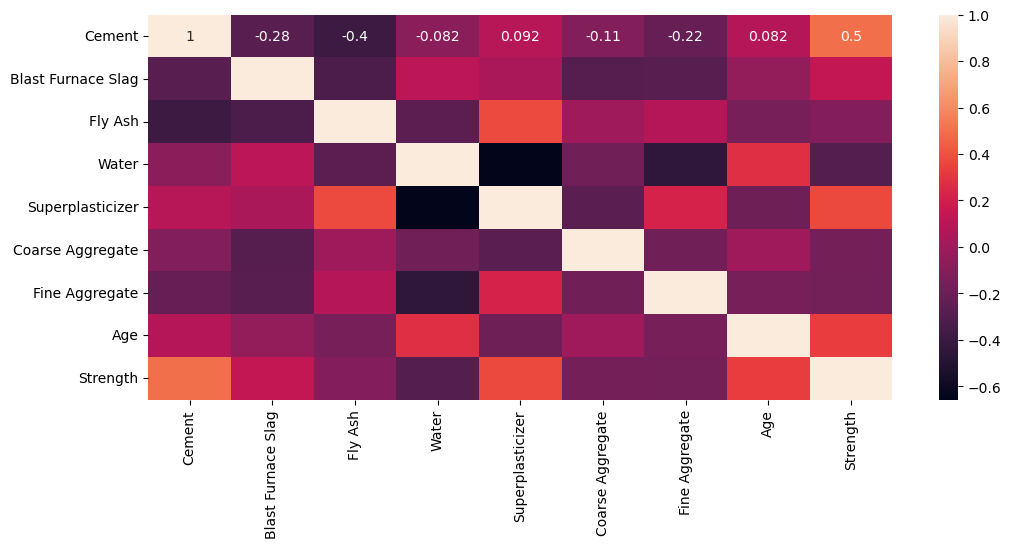

In [9]:
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

As our objective is mainly to build the model, we will just touch a few in this EDA (exploratory data analysis) section.

### 4. MODEL - Construct Model to Predict and Forecast.

The part where the magic happens.

#### Split Data to Predictors and Target

In [10]:
X = df.iloc[:,:-1]
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [11]:
y = df.iloc[:,-1]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Save number of feature columns, <strong><i>n_cols</i></strong> to use later in model development.

In [12]:
n_cols = X.shape[1]
n_cols

8

#### Importing SKLEARN and KERAS Libraries

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense

### Building the Model

<strong><font color="red">A. BASELINE MODEL</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layer: 1</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 50</li>
</ul>

In [14]:
mse_A = []
r2_A = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_A.append(mean_squared_error(y_test, y_pred))
    r2_A.append(r2_score(y_test, y_pred))

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7252.3252
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4898.9438
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3674.4858
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2543.8376
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1843.2791
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1350.4230
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 953.3451 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 801.6514 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 637.6248 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 577.5709
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 436.3085
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 446.5672 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 397.9169 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 352.7913 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 673603.5625
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 381339.9375
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 194225.9219
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88306.7031  
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39670.8633 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25970.5664 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22530.2090 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20612.5879 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20015.1680 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19534.8633 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16163.0605
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15434.0234
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15749.2803 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15604.5293 
Epoch 15/50
23/2

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2803.2104
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1942.0569
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1247.8015
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1060.7778
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 776.0693 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 688.8000 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 615.0596 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 560.8455 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 471.7939 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 433.2972 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 389.2648 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 348.7780 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 282.9059 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 290.2779 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 29847.0312
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4937.4131
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2526.1707
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2348.5625
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1702.2133
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1587.7540
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1349.1287
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1082.4027
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 950.2645  
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 835.2515 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 740.5342 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 602.1344 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 539.3079 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 459.6980 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2635.2310
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1296.4167
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 776.3445 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 561.9420 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 550.8473 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367.9787 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320.1259 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 281.0759 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252.0731 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 204.1148 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 187.5028 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 183.3664 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161.5576 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134.2644
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 469757.5625
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 233440.8594
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109714.1094
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45419.1055
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18220.2871 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6483.1641
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3114.7949
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1876.3473
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1821.6213
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1503.5640
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1408.9199
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1332.1382
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1298.2994
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1257.4038
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2894.6213
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 663.8934
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 605.1644
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 606.1995
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 540.4904
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 554.5833
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 484.7273
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 463.0049 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 417.6016
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 447.9711 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 393.9366 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 400.4181
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 359.7168 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 332.8792
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 15997.0537
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11908.2334 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8921.2100
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7824.9731
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6069.1245
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5094.7627
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4589.3994
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3641.0762
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3125.8115
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2660.3293
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2330.1042
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2154.1965
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1956.5934
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1539.1045
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 62944.3047
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11463.2285 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1409.6143
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1233.7334
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1180.9038
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1127.9006
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1144.7491
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1137.3792
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1061.8375
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1099.1581
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1021.6717
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 891.1891 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 924.6013 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 872.6425  
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 37670.6562
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4062.7239
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1736.5869
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1593.4974
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1390.5081
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1374.4802
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1219.9885
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1165.4547
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1010.9879
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 924.7261 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 859.0248 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 729.4250 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 688.2182 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 591.6025 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 284589.0312
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 154031.6094
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74783.8906
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33632.6172 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13745.5801 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6180.3613
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3288.6824
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2668.7480
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2188.8103
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2104.6628
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2348.8560
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2075.7859
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2306.0420
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1815.9965
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 122196.2578
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55225.4492 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18226.8145 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4428.3076
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1165.3564
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 663.4056
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 637.8402 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 603.6391 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 590.7776
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 524.0332
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 536.4223 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 465.6838 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 452.3929
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 447.6812 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2100.6812
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1563.1372
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1328.6224
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 992.9512 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 787.0096 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646.9126 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 567.7576
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 595.7100 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 482.5788 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 456.7402
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 421.3042 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 420.1262 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367.5217 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 390.8467
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5491.1494
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 628.5147
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 615.7330 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 568.6359 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 510.8658
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 462.0450 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 411.5746
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 392.1838 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 387.9247 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 371.8889
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 344.6855 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.4513 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 273.7896 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 263.8847
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 662104.6875
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 376055.3750
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 189725.4062
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98900.9219
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44545.1797 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25362.7656 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16757.1309 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12372.1123
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11491.9316 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10893.6309 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10975.0684 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10155.7422
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8887.0098
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8754.3594
Epoch 15/50
23/23 ━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 177787.1719
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50790.7109 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12427.5596 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6268.9854
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5900.2700
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5828.8530
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5399.2710
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4690.3999
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4849.7715
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4764.4219
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4185.3188
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3871.4841
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3724.0857
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3435.3713
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 623007.5000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 425616.5938
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 285489.0000
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 196690.7812
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 129478.6250
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83055.4922  
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53864.2812 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33944.3320 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20554.2559 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12395.5830 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8397.9580
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5453.6821
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3677.8506
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2776.6580
Epoch 15/50
23/23 ━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 83305.0391
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25670.0605 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5143.4238
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2340.3066
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2102.2910
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2164.6997
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1991.3746
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1857.0276
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1764.4227
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1508.1224
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1348.8976
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1299.2061
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1284.0385
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1161.0470
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 11647.7529
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4405.4536
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1860.1088
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1501.8646
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1251.5491
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1280.7965
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1153.1365
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1080.3401
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 959.3755 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 836.4892 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 854.6501 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 768.9676 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 745.9176 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 688.2129 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 560884.4375
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 343328.7188
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 195647.3281
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106852.6875
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55288.5508 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25265.9297
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11763.9102 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5269.8213
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2880.3843
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1989.1420
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1796.5984
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1768.4360
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1756.1539
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1781.0304
Epoch 15/50
23/23 ━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 10017.7656
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7158.4253
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5787.0415
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4748.5830
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3523.8801
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3370.8098
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2625.8127
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1975.0770
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1683.1476
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1295.5162
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1207.9882
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1015.8396
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 872.5807
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 764.4649 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 322162.2500
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188323.3125
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102658.8516
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51793.7891 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24972.3359
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12026.4883 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5688.6973
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3184.0146
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1877.3555
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1587.8479
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1203.8899
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1103.7732
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1097.9957
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1067.1763
Epoch 15/50
23/23 ━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2092.8691
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1033.3256
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 799.4351 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 725.6616 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 614.9742 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 601.3382 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 497.4787 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 459.3435 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 441.9675 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 468.7235 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 388.8650 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 370.1883 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 332.5749 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.3964 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 368967.5000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250764.8438
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153377.9844
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88686.2031  
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43294.1953 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19091.6016 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8283.2422
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6563.3052
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5035.5825
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5159.4897
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4596.2129
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4583.2397
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4108.8730
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3734.5266
Epoch 15/50
23/23 ━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 30090.9961
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6379.6177
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1456.2544
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1498.6630
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1351.3392
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1322.1135
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1360.9215
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1199.2479
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1204.5168
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1239.2061
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1138.6202
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1199.5065
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1207.2069
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 990.7004 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 54751.1016
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35090.1250 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22451.2852 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12220.7812 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4893.0591
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1387.4880
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 541.9396 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 436.6669 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 375.8702 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 411.6025 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 400.6026
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 389.8610
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 387.3243 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 355.7013 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 320705.7812
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180843.9375
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83121.4219  
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26578.0723 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6697.2886
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3769.3867
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3533.1172
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2931.2043
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2929.9712
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2529.7429
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2342.0264
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2184.8145
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1915.5110
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1678.6661
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14045.4912
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5383.9810
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4149.2104
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3012.7119
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2171.5811
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1659.1475
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1282.2074
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1328.4023
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1086.7938
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 969.6045 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 981.2880 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 815.7686  
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 721.1676
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 682.9893
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 66637.5391
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16307.6143 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4328.0083
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3450.8784
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3259.9006
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2917.9980
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2701.8562
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2290.4656
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1671.6370
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1421.5908
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1131.7882
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 940.3500 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 828.1985
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 775.1728 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 12135.1250
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3073.9019
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1081.8978
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 568.7648  
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 437.4308
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 376.6321 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 388.0510
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 388.4797 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 312.7261 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 270.8043 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 287.5531
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 263.4612 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 241.1009
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 241.9864
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 78347.2422
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25297.1152 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7259.5088
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3807.2227
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3222.2219
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2882.8250
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2703.8579
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2487.9885
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2300.5542
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2100.4919
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1932.6012
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1549.3676
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1475.2423
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1315.7157
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 79492.3672 
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18790.7324
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4425.8457
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4323.3945
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3124.0342
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3017.4854
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3033.0120
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2926.7976
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2541.8381
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2095.7107
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2152.6643
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1921.5933
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1690.3951
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1790.5198
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 80682.7266
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22255.9473 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8127.8599 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7002.7017
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6222.2412
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5409.0083
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5445.9951
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5071.2515
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4341.5869
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4134.2178
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4038.9670
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3613.0408
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3292.5400
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2901.3955
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 261522.9219
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113934.9688
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34559.6250
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8756.4229
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7477.1421
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6782.9771
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6327.6953
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5680.9561
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5508.7759
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4874.9341
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4745.5728
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4049.4260
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3643.3491
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3433.1367
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 30707.0312
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6431.6006
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3090.6780
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2676.4031
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1886.4188
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1403.2976
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1012.1459
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 935.1925 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 763.2524 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 570.8512 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 510.8234 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 458.1205 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 399.0570 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 345.2553 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3608.1973
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1869.2369
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1349.5947
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 989.2828  
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 917.5394 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 753.3421 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 626.2409
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 582.1867
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 472.7448 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 427.5011 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 409.9683 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 415.7828
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 365.2764
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 359.6880
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 129663.4375
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40078.6875 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6628.8330 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1668.0898
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1694.0465
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1455.6727
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1300.5847
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1334.2491
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1248.6588
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1265.0842
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1203.1278
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1176.6061
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1188.3290
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1077.1399
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 29799.2930
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6806.0210
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 908.0416 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 499.9102
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 451.7378 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 437.7244
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 404.0046
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 340.2967
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 335.6778 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 315.2453 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 308.9770
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 275.0324
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 277.0001 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313.6080
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3242.0911
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1924.5138
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1066.0216
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 773.5031 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 652.3048 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 488.5777 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 385.6224 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 346.4835
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 284.9960 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 261.7569
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 211.3997 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 199.6581 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.6870 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 162.0689 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 12359.5127
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2003.0189
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1334.5538
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1084.6060
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 871.8475 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 727.0407
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 619.1118
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 625.5396 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 495.6330
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 446.8330
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 430.1050
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 337.4045
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 359.7878
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.1037
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 155728.4062
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75136.1797
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27449.6406
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10022.3799 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6774.1890
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5974.3965
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6120.3779
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5605.8247
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5399.2939
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4920.8418
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4442.2651
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4067.4272
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3729.1697
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3792.9656
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 282067.4688
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101158.1094
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28027.8730 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12299.9912 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10944.4375 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9540.6426 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8057.3223
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7879.0239
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6872.0503
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5769.1074
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5685.1357
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4885.7534
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4600.5308
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4490.0576
Epoch 15/50
23/23 ━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 210775.3438
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94214.5156 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34671.7969 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8858.4268 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3750.3296
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2835.3008
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2619.5232
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2518.2249
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2363.1997
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2194.7100
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2206.1326
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2004.1746
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1676.9656
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1478.9218
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 32060.8008
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7780.8687
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6101.1807
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5173.6348
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5125.1279
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4691.1704
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3673.2671
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3219.7935
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2607.6582
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2204.8711
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2087.2607
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1695.1089
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1573.5592
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1261.1866
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3732.2554
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 877.4335  
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 584.8773 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 456.3721
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 374.1254
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 278.1316
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 242.9155
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 198.1662 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 191.2256 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 185.7082 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 188.6700
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.1874
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151.8561 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 152.0562
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8060.3149
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2755.0461
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2244.8210
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1865.8140
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1730.8757
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1442.3608
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1247.0989
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1041.8314
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 918.7313 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 848.8443 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 670.2403 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 620.7596
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 535.5986
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 474.9034
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 10728.0303
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2237.7444
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2110.8118
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1862.8511
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1481.2104
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1651.2783
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1138.2043
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 950.3179 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 726.9518 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 679.6348 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 621.3289 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 580.5400  
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 466.4345 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 376.5789 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1560.0640
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 769.4227 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 650.2548 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 564.7078 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 510.8011 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 451.3254
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 405.5055 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 406.3867 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367.6963 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 305.5752 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320.3498 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 302.6297 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 286.9472 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 292.3586 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 69384.5234
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9413.1914  
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3756.4822
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4026.4492
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3123.1299
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2689.9514
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2383.9958
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2386.2371
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2243.2119
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1653.7091
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1687.9731
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1547.9688
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1384.8501
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1341.2274
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 820.4731 
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 553.3182 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 442.9520 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 391.8101 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 331.5493
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 309.9724
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 286.4982 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 246.8711 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 243.7531 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 220.3770 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 188.5805 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 204.6254 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179.3049 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167.0045 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

23/23 [==============================] - 0s 4ms/step - loss: 195.4864
Epoch 43/50
23/23 [==============================] - 0s 4ms/step - loss: 194.1265
Epoch 44/50
23/23 [==============================] - 0s 4ms/step - loss: 191.1369
Epoch 45/50
23/23 [==============================] - 0s 4ms/step - loss: 188.7450
Epoch 46/50
23/23 [==============================] - 0s 4ms/step - loss: 184.7971
Epoch 47/50
23/23 [==============================] - 0s 4ms/step - loss: 184.9971
Epoch 48/50
23/23 [==============================] - 0s 4ms/step - loss: 180.6198
Epoch 49/50
23/23 [==============================] - 0s 4ms/step - loss: 178.8848
Epoch 50/50
10/10 [==============================] - 0s 3ms/step
Epoch 1/50
23/23 [==============================] - 2s 4ms/step - loss: 55583.8047
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 24737.4590
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 10303.6133
Epoch 4/50
23/23 [========================

23/23 [==============================] - 0s 4ms/step - loss: 277.7814
Epoch 41/50
23/23 [==============================] - 0s 4ms/step - loss: 269.0534
Epoch 42/50
23/23 [==============================] - 0s 4ms/step - loss: 262.0051
Epoch 43/50
23/23 [==============================] - 0s 4ms/step - loss: 253.1913
Epoch 44/50
23/23 [==============================] - 0s 4ms/step - loss: 246.7560
Epoch 45/50
23/23 [==============================] - 0s 4ms/step - loss: 239.6892
Epoch 46/50
23/23 [==============================] - 0s 4ms/step - loss: 233.4345
Epoch 47/50
23/23 [==============================] - 0s 4ms/step - loss: 226.9704
Epoch 48/50
23/23 [==============================] - 0s 4ms/step - loss: 220.9779
Epoch 49/50
23/23 [==============================] - 0s 4ms/step - loss: 216.0703
Epoch 50/50
10/10 [==============================] - 0s 3ms/step
Epoch 1/50
23/23 [==============================] - 3s 4ms/step - loss: 12625.1650
Epoch 2/50
23/23 [==========================

23/23 [==============================] - 0s 4ms/step - loss: 188.6807
Epoch 39/50
23/23 [==============================] - 0s 4ms/step - loss: 181.2146
Epoch 40/50
23/23 [==============================] - 0s 4ms/step - loss: 175.9064
Epoch 41/50
23/23 [==============================] - 0s 4ms/step - loss: 170.2347
Epoch 42/50
23/23 [==============================] - 0s 5ms/step - loss: 163.5591
Epoch 43/50
23/23 [==============================] - 0s 4ms/step - loss: 158.0875
Epoch 44/50
23/23 [==============================] - 0s 4ms/step - loss: 154.0490
Epoch 45/50
23/23 [==============================] - 0s 4ms/step - loss: 149.4540
Epoch 46/50
23/23 [==============================] - 0s 4ms/step - loss: 146.6544
Epoch 47/50
23/23 [==============================] - 0s 4ms/step - loss: 141.6265
Epoch 48/50
23/23 [==============================] - 0s 4ms/step - loss: 138.4447
Epoch 49/50
23/23 [==============================] - 0s 4ms/step - loss: 135.6124
Epoch 50/50
10/10 [=========

23/23 [==============================] - 0s 4ms/step - loss: 127.0110
Epoch 37/50
23/23 [==============================] - 0s 4ms/step - loss: 125.3090
Epoch 38/50
23/23 [==============================] - 0s 5ms/step - loss: 122.7637
Epoch 39/50
23/23 [==============================] - 0s 4ms/step - loss: 119.5175
Epoch 40/50
23/23 [==============================] - 0s 4ms/step - loss: 118.7945
Epoch 41/50
23/23 [==============================] - 0s 4ms/step - loss: 114.4821
Epoch 42/50
23/23 [==============================] - 0s 4ms/step - loss: 116.5802
Epoch 43/50
23/23 [==============================] - 0s 4ms/step - loss: 115.0154
Epoch 44/50
23/23 [==============================] - 0s 4ms/step - loss: 112.1308
Epoch 45/50
23/23 [==============================] - 0s 4ms/step - loss: 110.9431
Epoch 46/50
23/23 [==============================] - 0s 4ms/step - loss: 110.1622
Epoch 47/50
23/23 [==============================] - 0s 4ms/step - loss: 109.5902
Epoch 48/50
23/23 [=========

23/23 [==============================] - 0s 4ms/step - loss: 332.4722
Epoch 35/50
23/23 [==============================] - 0s 4ms/step - loss: 304.7788
Epoch 36/50
23/23 [==============================] - 0s 4ms/step - loss: 283.1294
Epoch 37/50
23/23 [==============================] - 0s 4ms/step - loss: 262.5569
Epoch 38/50
23/23 [==============================] - 0s 4ms/step - loss: 245.7747
Epoch 39/50
23/23 [==============================] - 0s 4ms/step - loss: 228.9739
Epoch 40/50
23/23 [==============================] - 0s 4ms/step - loss: 217.4746
Epoch 41/50
23/23 [==============================] - 0s 4ms/step - loss: 203.0221
Epoch 42/50
23/23 [==============================] - 0s 4ms/step - loss: 198.4604
Epoch 43/50
23/23 [==============================] - 0s 4ms/step - loss: 185.4290
Epoch 44/50
23/23 [==============================] - 0s 4ms/step - loss: 177.3129
Epoch 45/50
23/23 [==============================] - 0s 4ms/step - loss: 170.7409
Epoch 46/50
23/23 [=========

23/23 [==============================] - 0s 4ms/step - loss: 89.0909
Epoch 33/50
23/23 [==============================] - 0s 4ms/step - loss: 90.5562
Epoch 34/50
23/23 [==============================] - 0s 4ms/step - loss: 85.1559
Epoch 35/50
23/23 [==============================] - 0s 4ms/step - loss: 87.3117
Epoch 36/50
23/23 [==============================] - 0s 4ms/step - loss: 83.0478
Epoch 37/50
23/23 [==============================] - 0s 4ms/step - loss: 82.1899
Epoch 38/50
23/23 [==============================] - 0s 4ms/step - loss: 81.7393
Epoch 39/50
23/23 [==============================] - 0s 4ms/step - loss: 82.1742
Epoch 40/50
23/23 [==============================] - 0s 4ms/step - loss: 82.9493
Epoch 41/50
23/23 [==============================] - 0s 4ms/step - loss: 78.8791
Epoch 42/50
23/23 [==============================] - 0s 4ms/step - loss: 81.2658
Epoch 43/50
23/23 [==============================] - 0s 4ms/step - loss: 78.9764
Epoch 44/50
23/23 [=====================

23/23 [==============================] - 0s 4ms/step - loss: 884.4536
Epoch 31/50
23/23 [==============================] - 0s 4ms/step - loss: 832.2217
Epoch 32/50
23/23 [==============================] - 0s 4ms/step - loss: 787.5107
Epoch 33/50
23/23 [==============================] - 0s 4ms/step - loss: 741.4672
Epoch 34/50
23/23 [==============================] - 0s 4ms/step - loss: 697.9198
Epoch 35/50
23/23 [==============================] - 0s 4ms/step - loss: 659.1786
Epoch 36/50
23/23 [==============================] - 0s 4ms/step - loss: 622.3859
Epoch 37/50
23/23 [==============================] - 0s 4ms/step - loss: 589.0100
Epoch 38/50
23/23 [==============================] - 0s 4ms/step - loss: 558.1813
Epoch 39/50
23/23 [==============================] - 0s 4ms/step - loss: 529.9622
Epoch 40/50
23/23 [==============================] - 0s 4ms/step - loss: 501.5971
Epoch 41/50
23/23 [==============================] - 0s 4ms/step - loss: 475.5609
Epoch 42/50
23/23 [=========

23/23 [==============================] - 0s 4ms/step - loss: 2941.3323
Epoch 29/50
23/23 [==============================] - 0s 4ms/step - loss: 2891.2532
Epoch 30/50
23/23 [==============================] - 0s 4ms/step - loss: 2838.9480
Epoch 31/50
23/23 [==============================] - 0s 4ms/step - loss: 2788.9016
Epoch 32/50
23/23 [==============================] - 0s 4ms/step - loss: 2740.7324
Epoch 33/50
23/23 [==============================] - 0s 4ms/step - loss: 2694.0134
Epoch 34/50
23/23 [==============================] - 0s 4ms/step - loss: 2647.1367
Epoch 35/50
23/23 [==============================] - 0s 4ms/step - loss: 2598.4163
Epoch 36/50
23/23 [==============================] - 0s 4ms/step - loss: 2553.0542
Epoch 37/50
23/23 [==============================] - 0s 4ms/step - loss: 2509.8276
Epoch 38/50
23/23 [==============================] - 0s 4ms/step - loss: 2466.0410
Epoch 39/50
23/23 [==============================] - 0s 4ms/step - loss: 2422.0352
Epoch 40/50
23/2

23/23 [==============================] - 0s 4ms/step - loss: 325.1880
Epoch 27/50
23/23 [==============================] - 0s 4ms/step - loss: 319.3091
Epoch 28/50
23/23 [==============================] - 0s 4ms/step - loss: 313.0380
Epoch 29/50
23/23 [==============================] - 0s 4ms/step - loss: 309.9976
Epoch 30/50
23/23 [==============================] - 0s 4ms/step - loss: 304.3898
Epoch 31/50
23/23 [==============================] - 0s 4ms/step - loss: 299.8831
Epoch 32/50
23/23 [==============================] - 0s 4ms/step - loss: 294.4766
Epoch 33/50
23/23 [==============================] - 0s 4ms/step - loss: 289.5469
Epoch 34/50
23/23 [==============================] - 0s 4ms/step - loss: 284.6665
Epoch 35/50
23/23 [==============================] - 0s 4ms/step - loss: 280.5517
Epoch 36/50
23/23 [==============================] - 0s 4ms/step - loss: 275.9060
Epoch 37/50
23/23 [==============================] - 0s 4ms/step - loss: 271.2030
Epoch 38/50
23/23 [=========

23/23 [==============================] - 0s 4ms/step - loss: 4332.2061
Epoch 25/50
23/23 [==============================] - 0s 4ms/step - loss: 4203.1323
Epoch 26/50
23/23 [==============================] - 0s 4ms/step - loss: 4069.5562
Epoch 27/50
23/23 [==============================] - 0s 4ms/step - loss: 3946.6155
Epoch 28/50
23/23 [==============================] - 0s 4ms/step - loss: 3827.6372
Epoch 29/50
23/23 [==============================] - 0s 4ms/step - loss: 3709.0974
Epoch 30/50
23/23 [==============================] - 0s 4ms/step - loss: 3589.5933
Epoch 31/50
23/23 [==============================] - 0s 4ms/step - loss: 3484.0457
Epoch 32/50
23/23 [==============================] - 0s 4ms/step - loss: 3373.7646
Epoch 33/50
23/23 [==============================] - 0s 4ms/step - loss: 3269.8933
Epoch 34/50
23/23 [==============================] - 0s 4ms/step - loss: 3168.2766
Epoch 35/50
23/23 [==============================] - 0s 4ms/step - loss: 3075.4785
Epoch 36/50
23/2

23/23 [==============================] - 0s 6ms/step - loss: 493.1793
Epoch 23/50
23/23 [==============================] - 0s 5ms/step - loss: 477.9658
Epoch 24/50
23/23 [==============================] - 0s 5ms/step - loss: 463.8389
Epoch 25/50
23/23 [==============================] - 0s 6ms/step - loss: 451.3690
Epoch 26/50
23/23 [==============================] - 0s 5ms/step - loss: 440.3342
Epoch 27/50
23/23 [==============================] - 0s 5ms/step - loss: 429.5053
Epoch 28/50
23/23 [==============================] - 0s 5ms/step - loss: 419.4400
Epoch 29/50
23/23 [==============================] - 0s 4ms/step - loss: 407.8767
Epoch 30/50
23/23 [==============================] - 0s 4ms/step - loss: 396.6783
Epoch 31/50
23/23 [==============================] - 0s 4ms/step - loss: 386.3195
Epoch 32/50
23/23 [==============================] - 0s 5ms/step - loss: 377.9585
Epoch 33/50
23/23 [==============================] - 0s 4ms/step - loss: 368.1367
Epoch 34/50
23/23 [=========

23/23 [==============================] - 0s 5ms/step - loss: 1545.0725
Epoch 21/50
23/23 [==============================] - 0s 4ms/step - loss: 1410.7399
Epoch 22/50
23/23 [==============================] - 0s 4ms/step - loss: 1257.5575
Epoch 23/50
23/23 [==============================] - 0s 4ms/step - loss: 1127.3318
Epoch 24/50
23/23 [==============================] - 0s 4ms/step - loss: 1012.3130
Epoch 25/50
23/23 [==============================] - 0s 4ms/step - loss: 903.8940
Epoch 26/50
23/23 [==============================] - 0s 4ms/step - loss: 815.1931
Epoch 27/50
23/23 [==============================] - 0s 4ms/step - loss: 730.6457
Epoch 28/50
23/23 [==============================] - 0s 4ms/step - loss: 652.8488
Epoch 29/50
23/23 [==============================] - 0s 4ms/step - loss: 585.4880
Epoch 30/50
23/23 [==============================] - 0s 4ms/step - loss: 531.7407
Epoch 31/50
23/23 [==============================] - 0s 4ms/step - loss: 480.7994
Epoch 32/50
23/23 [====

Epoch 18/50
23/23 [==============================] - 0s 4ms/step - loss: 1512.8528
Epoch 19/50
23/23 [==============================] - 0s 4ms/step - loss: 1476.0040
Epoch 20/50
23/23 [==============================] - 0s 4ms/step - loss: 1438.9760
Epoch 21/50
23/23 [==============================] - 0s 4ms/step - loss: 1402.8066
Epoch 22/50
23/23 [==============================] - 0s 4ms/step - loss: 1367.5826
Epoch 23/50
23/23 [==============================] - 0s 4ms/step - loss: 1334.4500
Epoch 24/50
23/23 [==============================] - 0s 4ms/step - loss: 1302.9851
Epoch 25/50
23/23 [==============================] - 0s 4ms/step - loss: 1269.8000
Epoch 26/50
23/23 [==============================] - 0s 4ms/step - loss: 1240.7714
Epoch 27/50
23/23 [==============================] - 0s 4ms/step - loss: 1212.6639
Epoch 28/50
23/23 [==============================] - 0s 4ms/step - loss: 1183.1228
Epoch 29/50
23/23 [==============================] - 0s 4ms/step - loss: 1154.3357
Epoc

23/23 [==============================] - 0s 4ms/step - loss: 1870.4368
Epoch 17/50
23/23 [==============================] - 0s 4ms/step - loss: 1805.3365
Epoch 18/50
23/23 [==============================] - 0s 4ms/step - loss: 1743.4174
Epoch 19/50
23/23 [==============================] - 0s 4ms/step - loss: 1679.8894
Epoch 20/50
23/23 [==============================] - 0s 4ms/step - loss: 1621.0925
Epoch 21/50
23/23 [==============================] - 0s 4ms/step - loss: 1565.9679
Epoch 22/50
23/23 [==============================] - 0s 4ms/step - loss: 1512.1736
Epoch 23/50
23/23 [==============================] - 0s 4ms/step - loss: 1457.6560
Epoch 24/50
23/23 [==============================] - 0s 4ms/step - loss: 1404.8931
Epoch 25/50
23/23 [==============================] - 0s 6ms/step - loss: 1356.8041
Epoch 26/50
23/23 [==============================] - 0s 4ms/step - loss: 1310.3977
Epoch 27/50
23/23 [==============================] - 0s 4ms/step - loss: 1266.1101
Epoch 28/50
23/2

23/23 [==============================] - 0s 4ms/step - loss: 2609.2192
Epoch 14/50
23/23 [==============================] - 0s 4ms/step - loss: 2263.8591
Epoch 15/50
23/23 [==============================] - 0s 4ms/step - loss: 2107.1255
Epoch 16/50
23/23 [==============================] - 0s 4ms/step - loss: 2022.0409
Epoch 17/50
23/23 [==============================] - 0s 4ms/step - loss: 1968.7815
Epoch 18/50
23/23 [==============================] - 0s 4ms/step - loss: 1925.5029
Epoch 19/50
23/23 [==============================] - 0s 4ms/step - loss: 1886.4728
Epoch 20/50
23/23 [==============================] - 0s 4ms/step - loss: 1849.3143
Epoch 21/50
23/23 [==============================] - 0s 4ms/step - loss: 1811.4056
Epoch 22/50
23/23 [==============================] - 0s 4ms/step - loss: 1774.2101
Epoch 23/50
23/23 [==============================] - 0s 4ms/step - loss: 1736.5653
Epoch 24/50
23/23 [==============================] - 0s 4ms/step - loss: 1699.5116
Epoch 25/50
23/2

23/23 [==============================] - 0s 4ms/step - loss: 651.0074
Epoch 11/50
23/23 [==============================] - 0s 4ms/step - loss: 598.8667
Epoch 12/50
23/23 [==============================] - 0s 4ms/step - loss: 551.3585
Epoch 13/50
23/23 [==============================] - 0s 4ms/step - loss: 513.8533
Epoch 14/50
23/23 [==============================] - 0s 4ms/step - loss: 486.9383
Epoch 15/50
23/23 [==============================] - 0s 4ms/step - loss: 442.8506
Epoch 16/50
23/23 [==============================] - 0s 4ms/step - loss: 413.2915
Epoch 17/50
23/23 [==============================] - 0s 4ms/step - loss: 385.7175
Epoch 18/50
23/23 [==============================] - 0s 4ms/step - loss: 361.8966
Epoch 19/50
23/23 [==============================] - 0s 4ms/step - loss: 337.5861
Epoch 20/50
23/23 [==============================] - 0s 4ms/step - loss: 312.1421
Epoch 21/50
23/23 [==============================] - 0s 4ms/step - loss: 293.4742
Epoch 22/50
23/23 [=========

23/23 [==============================] - 0s 4ms/step - loss: 1894.1385
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 1794.4896
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss: 1722.8948
Epoch 11/50
23/23 [==============================] - 0s 4ms/step - loss: 1674.1826
Epoch 12/50
23/23 [==============================] - 0s 4ms/step - loss: 1642.4497
Epoch 13/50
23/23 [==============================] - 0s 4ms/step - loss: 1619.4469
Epoch 14/50
23/23 [==============================] - 0s 4ms/step - loss: 1601.7987
Epoch 15/50
23/23 [==============================] - 0s 4ms/step - loss: 1587.3156
Epoch 16/50
23/23 [==============================] - 0s 4ms/step - loss: 1575.1390
Epoch 17/50
23/23 [==============================] - 0s 4ms/step - loss: 1564.8293
Epoch 18/50
23/23 [==============================] - 0s 4ms/step - loss: 1556.4241
Epoch 19/50
23/23 [==============================] - 0s 4ms/step - loss: 1548.7970
Epoch 20/50
23/23

23/23 [==============================] - 0s 4ms/step - loss: 131564.1719
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 85168.7344
Epoch 8/50
23/23 [==============================] - 0s 5ms/step - loss: 54694.4023
Epoch 9/50
23/23 [==============================] - 0s 5ms/step - loss: 35016.5234
Epoch 10/50
23/23 [==============================] - 0s 5ms/step - loss: 22285.3496
Epoch 11/50
23/23 [==============================] - 0s 5ms/step - loss: 14075.9990
Epoch 12/50
23/23 [==============================] - 0s 4ms/step - loss: 8948.2598
Epoch 13/50
23/23 [==============================] - 0s 4ms/step - loss: 5807.6924
Epoch 14/50
23/23 [==============================] - 0s 4ms/step - loss: 3974.0889
Epoch 15/50
23/23 [==============================] - 0s 4ms/step - loss: 2952.4414
Epoch 16/50
23/23 [==============================] - 0s 4ms/step - loss: 2413.0583
Epoch 17/50
23/23 [==============================] - 0s 4ms/step - loss: 2129.7693
Epoch 18/50


23/23 [==============================] - 0s 4ms/step - loss: 407.0077
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 319.2950
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 257.9692
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 218.0217
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 185.8646
Epoch 8/50
23/23 [==============================] - 0s 5ms/step - loss: 165.6931
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 150.7467
Epoch 10/50
23/23 [==============================] - 0s 5ms/step - loss: 135.7120
Epoch 11/50
23/23 [==============================] - 0s 5ms/step - loss: 127.8042
Epoch 12/50
23/23 [==============================] - 0s 7ms/step - loss: 121.5149
Epoch 13/50
23/23 [==============================] - 0s 5ms/step - loss: 118.6963
Epoch 14/50
23/23 [==============================] - 0s 5ms/step - loss: 118.1457
Epoch 15/50
23/23 [===============

23/23 [==============================] - 2s 4ms/step - loss: 15172.5654
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 5810.3198
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 2221.3120
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 1230.3987
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 1044.4171
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 994.4976
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 949.2028
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 901.6852
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 855.0113
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss: 808.6555
Epoch 11/50
23/23 [==============================] - 0s 4ms/step - loss: 767.3231
Epoch 12/50
23/23 [==============================] - 0s 4ms/step - loss: 728.2899
Epoch 13/50
23/23 [===========

23/23 [==============================] - 0s 4ms/step - loss: 3692.5266
Epoch 50/50
10/10 [==============================] - 0s 3ms/step
Epoch 1/50
23/23 [==============================] - 2s 4ms/step - loss: 148577.7812
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 88775.1094
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 40359.1797
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 14013.9482
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 7222.8892
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 6426.5825
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 5756.1948
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 5195.6514
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 4672.2236
Epoch 10/50
23/23 [==============================] - 0s 4ms/step - loss: 4191.7344
Epoch 11/50
23/23 [===================

In [15]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_A)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_A)))

mse_Mean: 289.64
mse_StdDev: 288.95


In [16]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_A)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_A)))

R^2_Mean: -0.05
R^2_StdDev: 1.07


<strong><font color="red">B. MODEL WITH NORMALIZED DATA</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layer: 1</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 50</li>
</ul>

Model is retrain with normalized data.

In [17]:
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [18]:
mse_B = []
r2_B = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_B.append(mean_squared_error(y_test, y_pred))
    r2_B.append(r2_score(y_test, y_pred))

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [19]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_B)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_B)))

mse_Mean: 369.15
mse_StdDev: 95.88


In [20]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_B)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_B)))

R^2_Mean: -0.33
R^2_StdDev: 0.36


<strong><font color="red">C. MODEL WITH 100 EPOCHS</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layer: 1</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 100</li>
</ul>

Model is retrained with 100 epochs.

In [21]:
mse_C = []
r2_C = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_C.append(mean_squared_error(y_test, y_pred))
    r2_C.append(r2_score(y_test, y_pred))

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [22]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_C)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_C)))

mse_Mean: 166.82
mse_StdDev: 22.64


In [23]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_C)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_C)))

R^2_Mean: 0.39
R^2_StdDev: 0.09


<strong><font color="red">D. MODEL WITH 3 HIDDEN LAYERS</font></strong>

<strong>Network Properties:</strong>
<ul>
  <li>Hidden Layers: 3</li>
  <li>Nodes: 10</li>
  <li>Activation Function: ReLU</li>
  <li>Optimizer: Adam</li>
  <li>Loss Function: Mean Squared Error</li>
  <li>Epochs: 100</li>
</ul>

Model is retrained with 3 hidden layers.

In [24]:
mse_D = []
r2_D = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_D.append(mean_squared_error(y_test, y_pred))
    r2_D.append(r2_score(y_test, y_pred))

C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


C:\Users\Premalatha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [25]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_D)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_D)))

mse_Mean: 95.76
mse_StdDev: 22.17


In [26]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_D)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_D)))

R^2_Mean: 0.66
R^2_StdDev: 0.08


### 5. iNTERPRET - Analyze and Interpret Model

#### Comparing all evaluation metrics

In [27]:
from IPython.display import HTML, display
import tabulate

tabletest = [['STEPS','MSE: Mean','MSE: StdDev','R^2: Mean','R^2: StdDev'],
         ['A', round(np.mean(mse_A),2), round(np.std(mse_A),2), round(np.mean(r2_A),2), round(np.std(r2_A),2)],
         ['B', round(np.mean(mse_B),2), round(np.std(mse_B),2), round(np.mean(r2_B),2), round(np.std(r2_B),2)],
         ['C', round(np.mean(mse_C),2), round(np.std(mse_C),2), round(np.mean(r2_C),2), round(np.std(r2_C),2)],
         ['D', round(np.mean(mse_D),2), round(np.std(mse_D),2), round(np.mean(r2_D),2), round(np.std(r2_D),2)]]

display(HTML(tabulate.tabulate(tabletest, tablefmt='html')))

STEPS,MSE: Mean,MSE: StdDev,R^2: Mean,R^2: StdDev
A,289.64,288.95,-0.05,1.07
B,369.15,95.88,-0.33,0.36
C,166.82,22.64,0.39,0.09
D,95.76,22.17,0.66,0.08


<strong>From the results above, we can clearly see that by applying:</strong>
<ul>
  <li>Data Normalization,</li>
  <li>Increasing Epochs,</li>
  <li>and Increasing Hidden Layers</li>
</ul>

<strong>the mean of MSE has gone down, while the mean of R^2 has gone up indicating that the model accuracy is getting better.</strong>